# Download dataset

In [1]:
%cd /content/drive/MyDrive/Colab/pydomains/screenshots/processed

/content/drive/MyDrive/Colab/pydomains/screenshots/processed


In [3]:
!cat $(ls -l final_data.tar.7za* | awk '{print $9}' | tr '\n' ' ') > final_data.tar.7z

In [4]:
!7z e final_data.tar.7z


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,8 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 47251226175 bytes (45 GiB)

Extracting archive: final_data.tar.7z
--
Path = final_data.tar.7z
Type = 7z
Physical Size = 47251226175
Headers Size = 98
Method = LZMA2:20
Solid = -
Blocks = 1

  0%    
Would you like to replace the existing file:
  Path:     ./final_data.tar
  Size:     0 bytes
  Modified: 2022-12-06 16:16:29
with the file from archive:
  Path:     final_data.tar
  Size:     52772003840 bytes (50 GiB)
  Modified: 2022-12-02 19:03:58
? (Y)es / (N)o / (A)lways / (S)kip all / A(u)to rename all / (Q)uit? A

  0% - final_data.tar                       1% - final_data.tar                       2% - final_data.tar

In [5]:
!rm -rf final_data.tar.7z

In [6]:
%cd /content/dataset/

/content/dataset


In [7]:
!cp /content/drive/MyDrive/Colab/pydomains/screenshots/processed/final_data.tar /content/dataset/

In [8]:
!tar xf final_data.tar

# Preprocessing

In [1]:
import tensorflow as tf
import pathlib
import PIL

import matplotlib.pyplot as plt

In [2]:
data_dir = pathlib.Path("/content/dataset/final_data")

In [3]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

202897


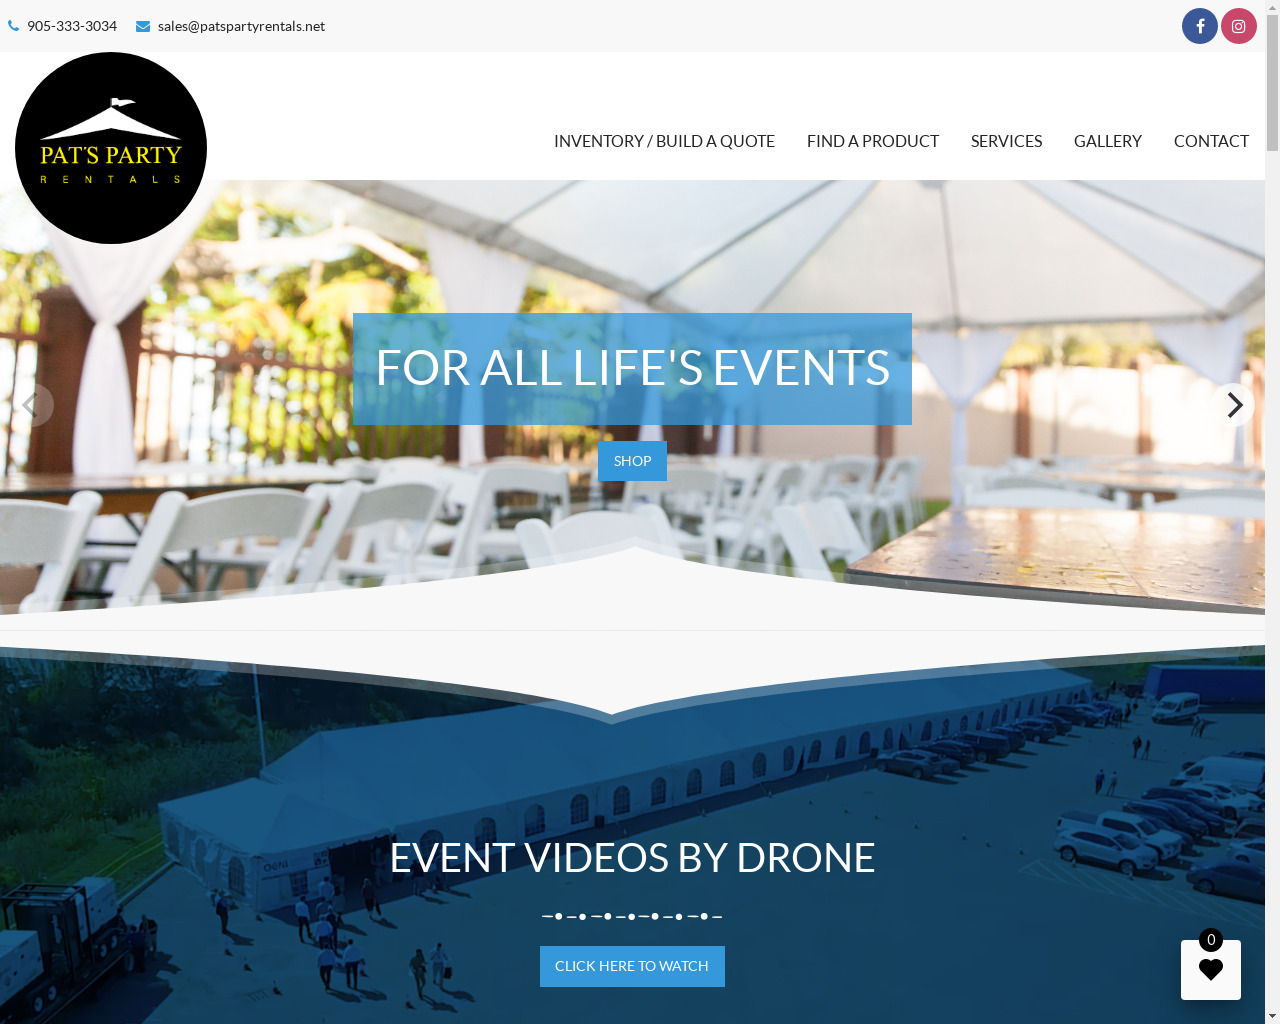

In [4]:
shopping = list(data_dir.glob('shopping/*'))
PIL.Image.open(str(shopping[0]))

In [5]:
batch_size = 32
img_height = 180
img_width = 180

In [6]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 202897 files belonging to 54 classes.
Using 162318 files for training.


In [7]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 202897 files belonging to 54 classes.
Using 40579 files for validation.


In [8]:
class_names = train_ds.class_names
print(class_names)

['adv', 'aggressive', 'alcohol', 'anonvpn', 'automobile', 'costtraps', 'dating', 'downloads', 'drugs', 'dynamic', 'education', 'finance', 'fortunetelling', 'forum', 'gamble', 'government', 'hacking', 'hobby', 'homestyle', 'hospitals', 'imagehosting', 'isp', 'jobsearch', 'library', 'military', 'models', 'movies', 'music', 'news', 'podcasts', 'politics', 'porn', 'radiotv', 'recreation', 'redirector', 'religion', 'remotecontrol', 'ringtones', 'science', 'searchengines', 'sex', 'shopping', 'socialnet', 'spyware', 'tracker', 'updatesites', 'urlshortener', 'violence', 'warez', 'weapons', 'webmail', 'webphone', 'webradio', 'webtv']


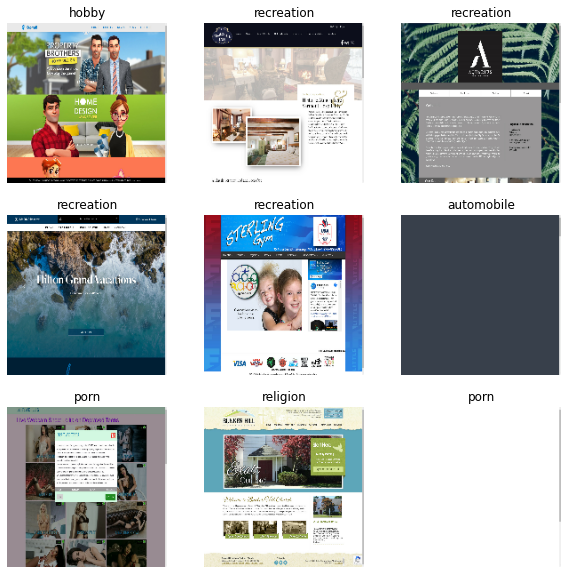

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [10]:
import numpy as np

for images, labels in train_ds.take(1):
  arr = images[i].numpy()
  print(arr[0][0])

[0. 0. 0.]


In [19]:
import cv2
import glob
from google.colab.patches import cv2_imshow

i = 0

blank_images = []

for category in class_names:
  print(f"processing {category}")
  for filename in glob.glob(f"/content/dataset/final_data/{category}/*.jpg"):
    #print(filename)
    img = cv2.imread(filename)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #cv2_imshow(img)
    #cv2_imshow(gray)
    #print(img)
    #print(gray)
    #print(gray.shape)
    #print((gray == 255).all())
    # white images
    flat = gray.flatten()
    if(flat == flat[0]).all():
      #cv2_imshow(gray)
      blank_images.append(filename)
    if i%1000 == 0:
      print(f"processed {i}")
    i = i+1

processing adv
processed 0
processing aggressive
processing alcohol
processed 1000
processing anonvpn
processing automobile
processed 2000
processing costtraps
processing dating
processing downloads
processed 3000
processing drugs
processing dynamic
processing education
processed 4000
processed 5000
processed 6000
processing finance
processed 7000
processed 8000
processed 9000
processing fortunetelling
processing forum
processed 10000
processed 11000
processing gamble
processed 12000
processing government
processing hacking
processed 13000
processing hobby
processed 14000
processed 15000
processed 16000
processed 17000
processed 18000
processed 19000
processed 20000
processed 21000
processing homestyle
processing hospitals
processed 22000
processing imagehosting
processing isp
processing jobsearch
processed 23000
processing library
processing military
processing models
processed 24000
processing movies
processed 25000
processing music
processed 26000
processing news
processed 27000
pro

In [20]:
len(blank_images)

3707

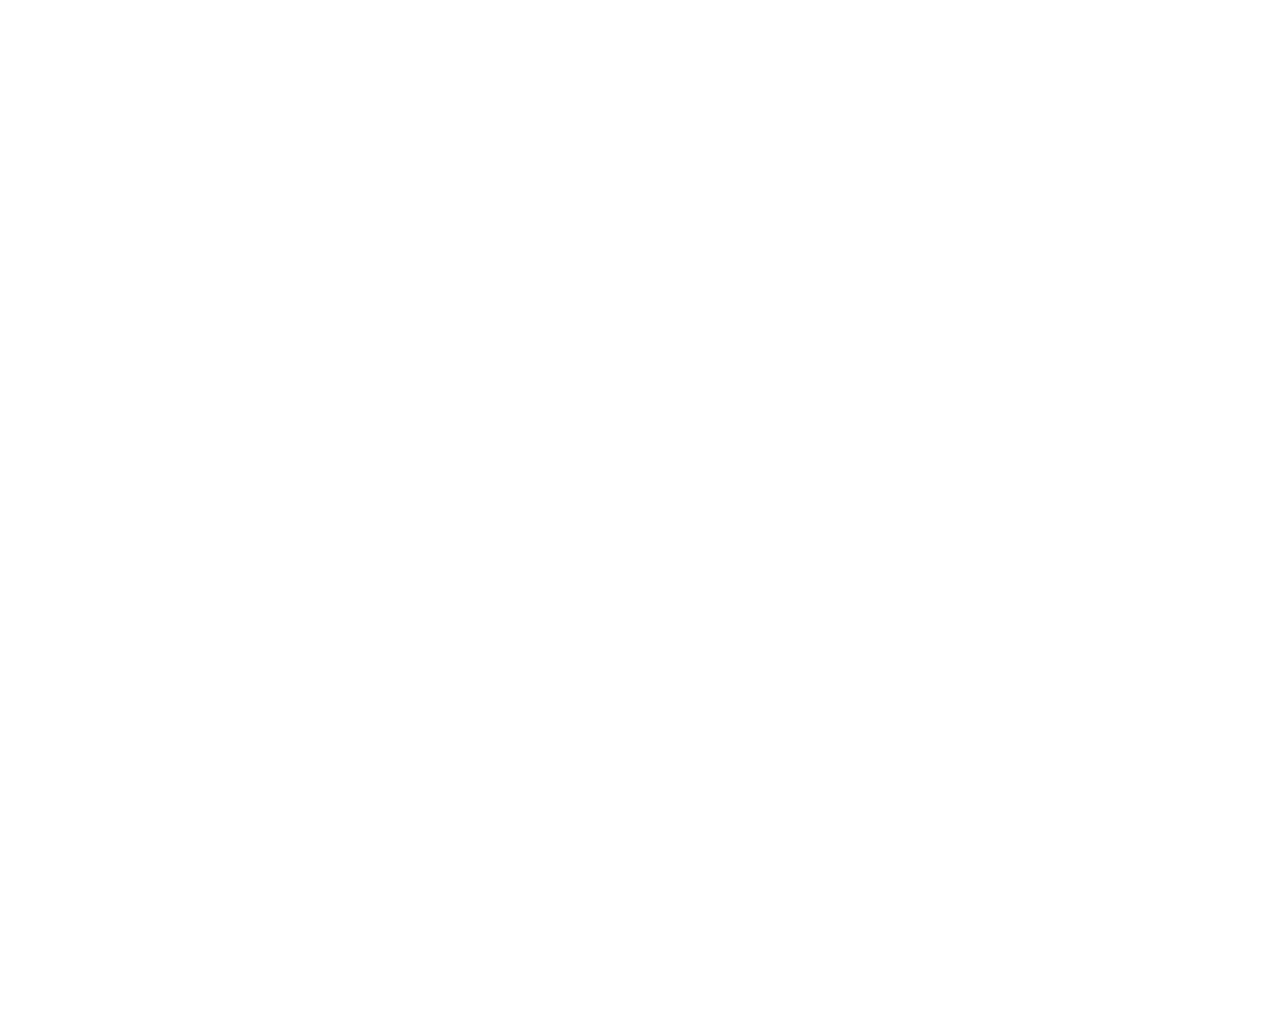

In [22]:
PIL.Image.open(str(blank_images[0]))

In [23]:
!pwd

/content


In [24]:
with open('blank_images.txt', 'w') as f:
    for line in blank_images:
        f.write(f"{line}\n")

In [25]:
!cat blank_images.txt

/content/dataset/final_data/adv/shoppingads.jpg
/content/dataset/final_data/adv/widgetbucks.jpg
/content/dataset/final_data/adv/ad2.darkbb.jpg
/content/dataset/final_data/adv/adspirit.jpg
/content/dataset/final_data/adv/exactis.jpg
/content/dataset/final_data/adv/checkm8.jpg
/content/dataset/final_data/adv/fdl.eu.msn.jpg
/content/dataset/final_data/adv/inboxdollars.jpg
/content/dataset/final_data/adv/enic.jpg
/content/dataset/final_data/adv/incentivenetworks.jpg
/content/dataset/final_data/adv/xprofiler.jpg
/content/dataset/final_data/adv/advert-layer.jpg
/content/dataset/final_data/adv/bannerwerbung.jpg
/content/dataset/final_data/adv/befree.jpg
/content/dataset/final_data/adv/o0.winfuture.jpg
/content/dataset/final_data/adv/ban.hiwit.jpg
/content/dataset/final_data/aggressive/bnp.jpg
/content/dataset/final_data/aggressive/onethirdoftheholocaust.jpg
/content/dataset/final_data/alcohol/dom-koelsch.jpg
/content/dataset/final_data/automobile/ballardtech.jpg
/content/dataset/final_data/au

In [26]:
!cp blank_images.txt /content/drive/MyDrive/Colab/pydomains/screenshots/processed

In [27]:
!find /content/dataset/final_data/ -name "*.jpg" | wc -l

202897


In [28]:
import os 

for image in blank_images:
  os.remove(image)

In [29]:
!find /content/dataset/final_data/ -name "*.jpg" | wc -l

199190


(1024, 1280, 3)


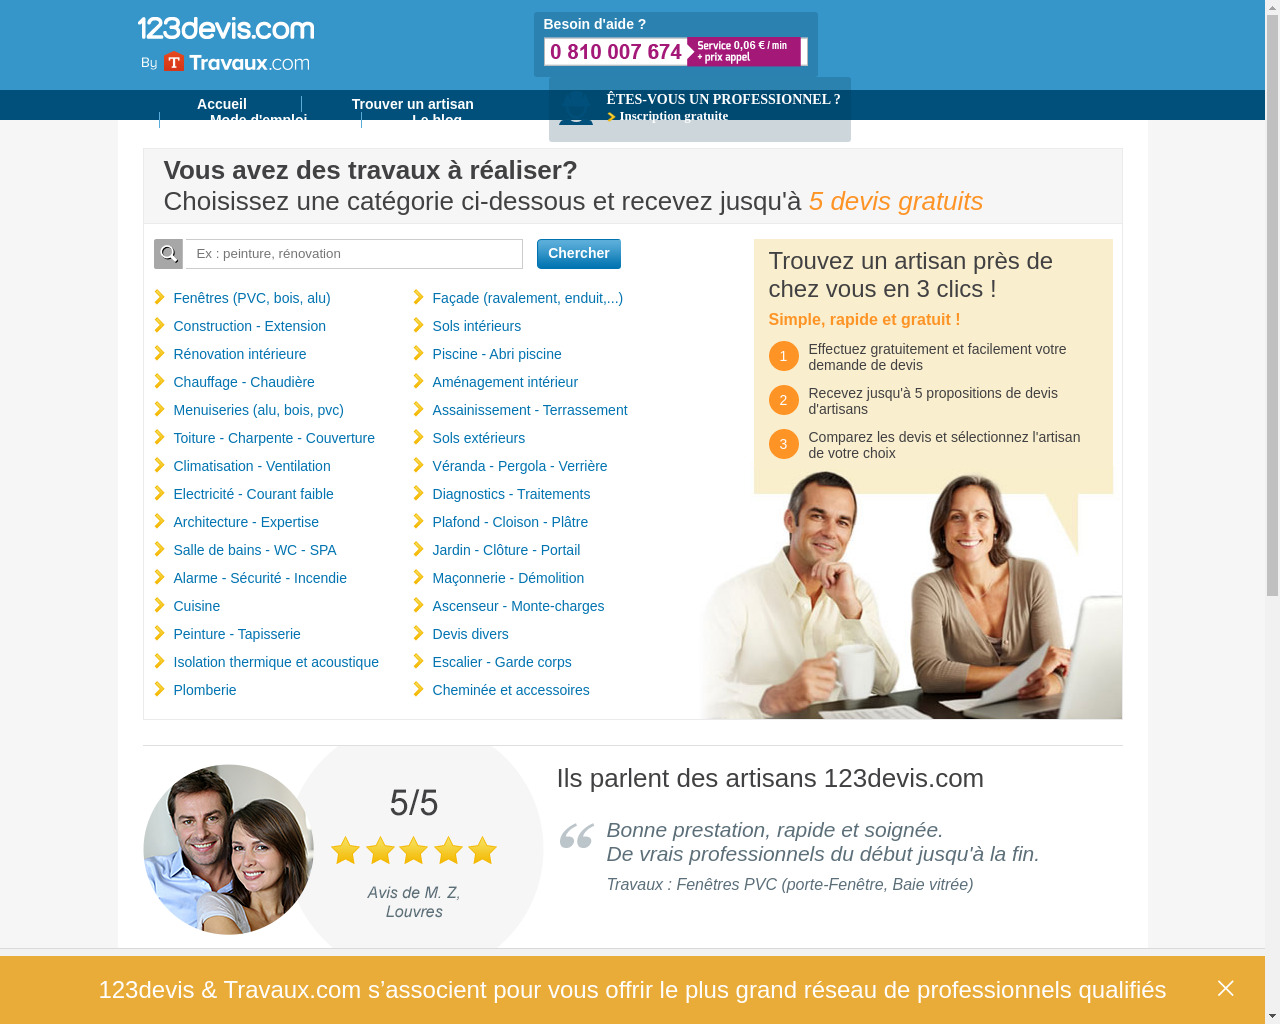

In [31]:
img = cv2.imread("/content/dataset/final_data/adv/123devis.jpg")
print(img.shape)
cv2_imshow(img)

(254, 254, 3)


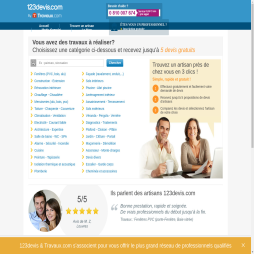

In [32]:
resized = cv2.resize(img, (254, 254), interpolation = cv2.INTER_AREA)
print(resized.shape)
cv2_imshow(resized)

In [33]:
cv2.imwrite("/tmp/adv1.jpg", resized)

True

In [34]:
!du -sh /tmp/adv1.jpg

28K	/tmp/adv1.jpg


In [36]:
!du -sh /content/dataset/final_data/adv/123devis.jpg

328K	/content/dataset/final_data/adv/123devis.jpg


In [37]:
!mkdir /content/dataset/processed

In [39]:
x = "/content/dataset/final_data/adv/123devis.jpg"
x.split("/")[-1]

'123devis.jpg'

In [40]:
for category in class_names:
  print(f"processing {category}")
  os.mkdir(f"/content/dataset/processed/{category}")
  for filename in glob.glob(f"/content/dataset/final_data/{category}/*.jpg"):
    img = cv2.imread(filename)
    resized = cv2.resize(img, (254, 254), interpolation = cv2.INTER_AREA)
    cv2.imwrite(f"/content/dataset/processed/{category}/{filename.split('/')[-1]}", resized)
    if i%1000 == 0:
      print(f"processed {i}")
    i = i+1

processing adv
processed 203000
processing aggressive
processing alcohol
processing anonvpn
processing automobile
processed 204000
processed 205000
processing costtraps
processing dating
processing downloads
processed 206000
processing drugs
processing dynamic
processing education
processed 207000
processed 208000
processed 209000
processing finance
processed 210000
processed 211000
processed 212000
processing fortunetelling
processing forum
processed 213000
processing gamble
processed 214000
processed 215000
processing government
processing hacking
processing hobby
processed 216000
processed 217000
processed 218000
processed 219000
processed 220000
processed 221000
processed 222000
processed 223000
processing homestyle
processing hospitals
processed 224000
processing imagehosting
processing isp
processing jobsearch
processed 225000
processed 226000
processing library
processing military
processing models
processing movies
processed 227000
processing music
processed 228000
processed 22

In [41]:
%cd /content/dataset

/content/dataset


In [42]:
!tar czf processed.tar processed

In [43]:
%cp /content/dataset/processed.tar /content/drive/MyDrive/Colab/pydomains/screenshots/processed